In [9]:
# Libraries required

import pandas as pd
import random
import joblib
import time
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

In [10]:
# Directories & lists definations

# directory = "C:\\Users\\sahil\\Downloads\\ASL-Sensor-Dataglove-Dataset\\ASL-Sensor-Dataglove-Dataset\\001\\"
data_directory = "C:\\Users\\sahil\\OneDrive\\Desktop\\Data to processing\\"          #Directory containing data
model_directory = 'C:\\Users\\sahil\\OneDrive\\Desktop\\model.joblib'                 #Directory to save trained model

selected_filenames = [
    "a.csv",
    "b.csv",
    "c.csv",
    "d.csv",
    "e.csv",
    "f.csv",
    "g.csv",
    "h.csv",
    "i.csv",
    "k.csv",
    "l.csv",
    "m.csv",
    "n.csv",
    "o.csv",
    "p.csv",
    "q.csv",
    "r.csv",
    "s.csv",
    "t.csv",
    "u.csv",
    "v.csv",
    "w.csv",
    "x.csv",
    "y.csv",
]
# selected_filenames = [
#     "a.csv",
#     "b.csv",
#     "c.csv",
#     "d.csv",
#     "e.csv",
#     "f.csv",
#     "g.csv",
#     "h.csv",
#     "i.csv",
#     "j.csv",
#     "k.csv",
#     "l.csv",
#     "m.csv",
#     "n.csv",
#     "o.csv",
#     "p.csv",
#     "q.csv",
#     "r.csv",
#     "s.csv",
#     "t.csv",
#     "u.csv",
#     "v.csv",
#     "w.csv",
#     "x.csv",
#     "y.csv",
#     "z.csv",
#     "yes.csv",
#     "you.csv",
#     "good.csv",
#     "goodbye.csv",
#     "hello.csv",
#     "hungry.csv",
#     "me.csv",
#     "please.csv",
#     "sorry.csv",
#     "thankyou.csv",
#     "no.csv",
#     "bad.csv",
#     "deaf.csv",
#     "fine.csv"   
# ]

filenames = [data_directory + filename for filename in selected_filenames]

# Lists to store values during each training
sample_numbers = []
training_times = []
accuracies = []

In [11]:
#Function to combine all the data
#Param: File names (list), Number of samples (int)
#Ret: DF containing all the comned data

def combine_csv_files(filenames, n):
    selected_rows = []

    for filename in filenames:
        df = pd.read_csv(filename)
        selected = df.sample(min(n, len(df)))
        selected_rows.append(selected)

    combined_df = pd.concat(selected_rows, ignore_index=True)
    # class_counts = combined_df['Label'].value_counts()
    # print(class_counts)
    return combined_df


In [12]:
#Function to train the data
#Param: Model, DF containing all the combined data (pd), Number of samples (int)
#Ret: Training time (Float), accuracy (Float)

def train_model(model, combined_data, n):
    
    # Step 1: Split the data into features (X) and label (y)
    print("No. of samples: ", n)
    # X = combined_data.iloc[:, 2:18]  # Features (columns 3 to 2nd last)
    X = combined_data.iloc[:, :-1]  # Features (columns 1 to 2nd last)

    y = combined_data.iloc[:, -1]    # label (last column)

    # Step 2: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    t_start = time.time()
    # print("Start Time:", t_start)
    
    # Step 3: Train a classifier & keep track of training time 
    model.fit(X_train, y_train)
    t_end = time.time()
    # print("Stop Time:", t_end)
    t_diff = t_end - t_start
    print("Training Time:", t_diff)


    # Step 4: Make predictions on the test set
    y_pred = model.predict(X_test)

    # Step 5: Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Step 6: Save the model using joblib
    joblib.dump(model, model_directory)

    #print("Predictions on new data:", y_pred)
    print(classification_report(y_test, y_pred))
    return t_diff, accuracy


In [13]:
#Function to combine & train the data for all number of samples & append sample_numbers, training_times, accuracies into lists
#Param: Model
#Ret: Nothing

def combine_data_model_train(model):
    # Loop over different sample sizes
    for n in range(50, 1501, 50):
        combined_data = combine_csv_files(filenames, n)
        train_time, accuracy = train_model(model,combined_data, n)
        
        # Append values to lists
        sample_numbers.append(n)
        training_times.append(train_time)
        accuracies.append(accuracy)

In [14]:
#Function to plot grapgh of training time & accuracy w.r.t number of samples
#Param: Model
#Ret: Nothing

def plot():   
    # Creating subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # Plotting n vs train_time
    axs[0].plot(sample_numbers, training_times, marker='o', color='blue')
    axs[0].set_title("Sample Size vs. Training Time")
    axs[0].set_xlabel("Sample Size (n)")
    axs[0].set_ylabel("Training Time (seconds)")
    axs[0].grid(True)

    # Plotting n vs accuracy
    axs[1].plot(sample_numbers, accuracies, marker='o', color='green')
    axs[1].set_title("Sample Size vs. Accuracy")
    axs[1].set_xlabel("Sample Size (n)")
    axs[1].set_ylabel("Accuracy")
    axs[1].grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

SVM, Linear Kernel
No. of samples:  50
Training Time: 0.08020639419555664
Accuracy: 1.0
              precision    recall  f1-score   support

           a       1.00      1.00      1.00         6
           b       1.00      1.00      1.00        12
           c       1.00      1.00      1.00         9
           d       1.00      1.00      1.00        12
           e       1.00      1.00      1.00        11
           f       1.00      1.00      1.00        12
           g       1.00      1.00      1.00        13
           h       1.00      1.00      1.00        12
           i       1.00      1.00      1.00        11
           k       1.00      1.00      1.00         7
           l       1.00      1.00      1.00        10
           m       1.00      1.00      1.00         7
           n       1.00      1.00      1.00        11
           o       1.00      1.00      1.00        10
           p       1.00      1.00      1.00        10
           q       1.00      1.00      1.00    

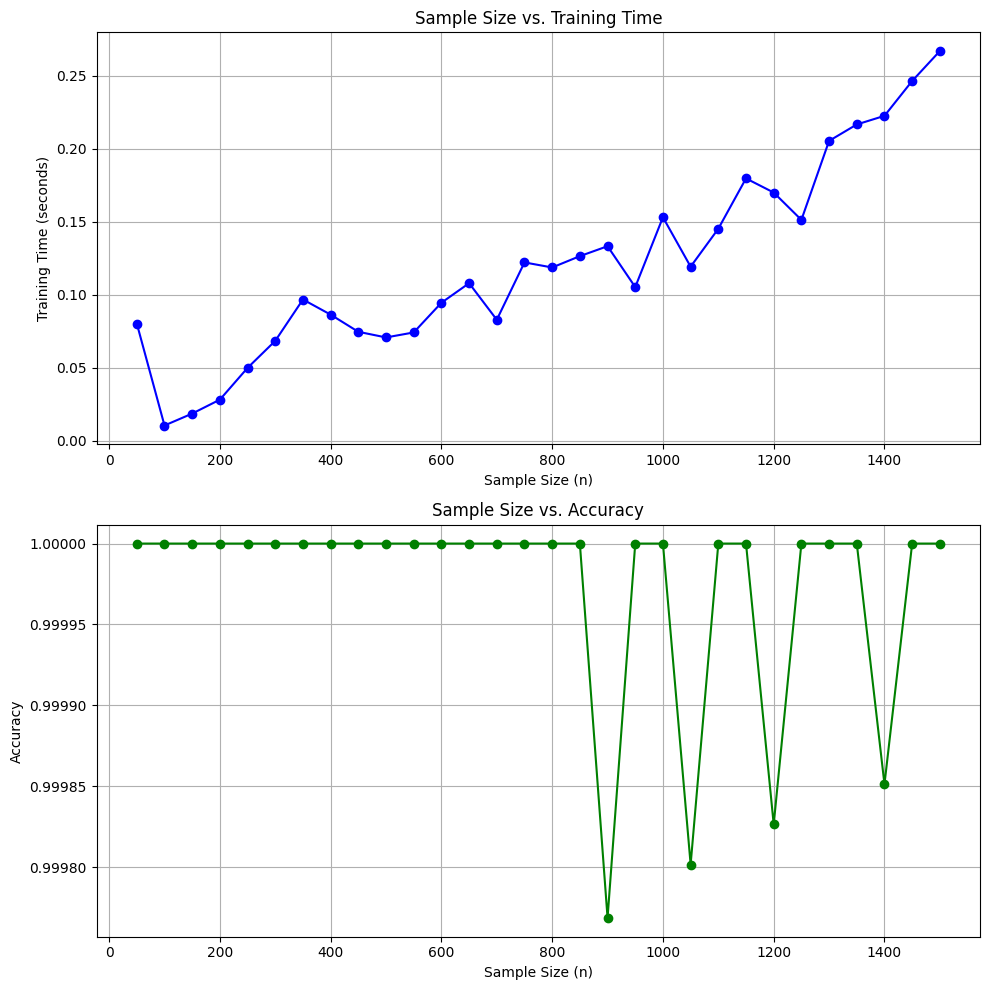

In [15]:
# Sequencially call all the models & plot training results

model = SVC(kernel='linear', random_state=42)
print("SVM, Linear Kernel")
combine_data_model_train(model)


# model = LogisticRegression(max_iter=1000,solver='saga')
# print("Logistic Regression")
# combine_data_model_train(model)


# model = KNeighborsClassifier()
# print("K-Nearest Neighbors")
# combine_data_model_train(model)


# model = SVC(C=10000,gamma=0.1)
# print("RBF SVM")
# combine_data_model_train(model)


# model = SVC(kernel='linear')
# print("Linear SVM")
# combine_data_model_train(model)


# model = GradientBoostingClassifier(n_estimators=100)
# print("Gradient Boosting Classifier")
# combine_data_model_train(model)


# model = tree.DecisionTreeClassifier()
# print("Decision Tree")
# combine_data_model_train(model)


# model = RandomForestClassifier(n_estimators=100)
# print("Random Forest")
# combine_data_model_train(model)


# model = MLPClassifier(alpha = 1)
# print("Neural Net")
# combine_data_model_train(model)


# model = GaussianNB()
# print("Gaussian Naive Bayes")
# combine_data_model_train(model)


# model = AdaBoostClassifier()
# print("AdaBoost Classifier")
# combine_data_model_train(model)


# model = QuadraticDiscriminantAnalysis()
# print("Quadratic Discriminant Analysis")
# combine_data_model_train(model)

# model = GaussianProcessClassifier()
# print("Gaussian Process")
# combine_data_model_train(model)

plot()
sample_numbers.clear()
training_times.clear()
accuracies.clear()